In [1]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans  

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
books_sample = pd.read_csv('books_data.csv')

In [6]:
x = books_sample["Text"] 

In [7]:
authors=books_sample["Author"]

In [5]:
from sklearn.preprocessing import LabelEncoder
y = books_sample['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [8]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder
y = books_sample['Author']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
books_sample['encoded_author']=y

In [9]:
lemmatiser = WordNetLemmatizer()
#Add a condition to check for digits
def text_process(tex):
    # 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)
    # 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '
    # 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [10]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(x)
text = tfidf.transform(x)

In [11]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(text)
print(f"Total variance explained: {np.sum(svd.explained_variance_ratio_):.2f}")

Total variance explained: 0.02


In [12]:
dist = 1 - cosine_similarity(X_svd)
dist = dist - dist.min() # get rid of some pesky floating point errors that give neg. distance

In [13]:
from sklearn.metrics import silhouette_score

for i in [2,3,4,5,6]:
    hc= AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    km= hc.fit_predict(X_svd,y)  

    score = silhouette_score(X_svd, km, metric='euclidean')
    print(score)

0.5487420401998124
0.5127733598040642
0.3737597409275993
0.376051165219836
0.3498184479178434


/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


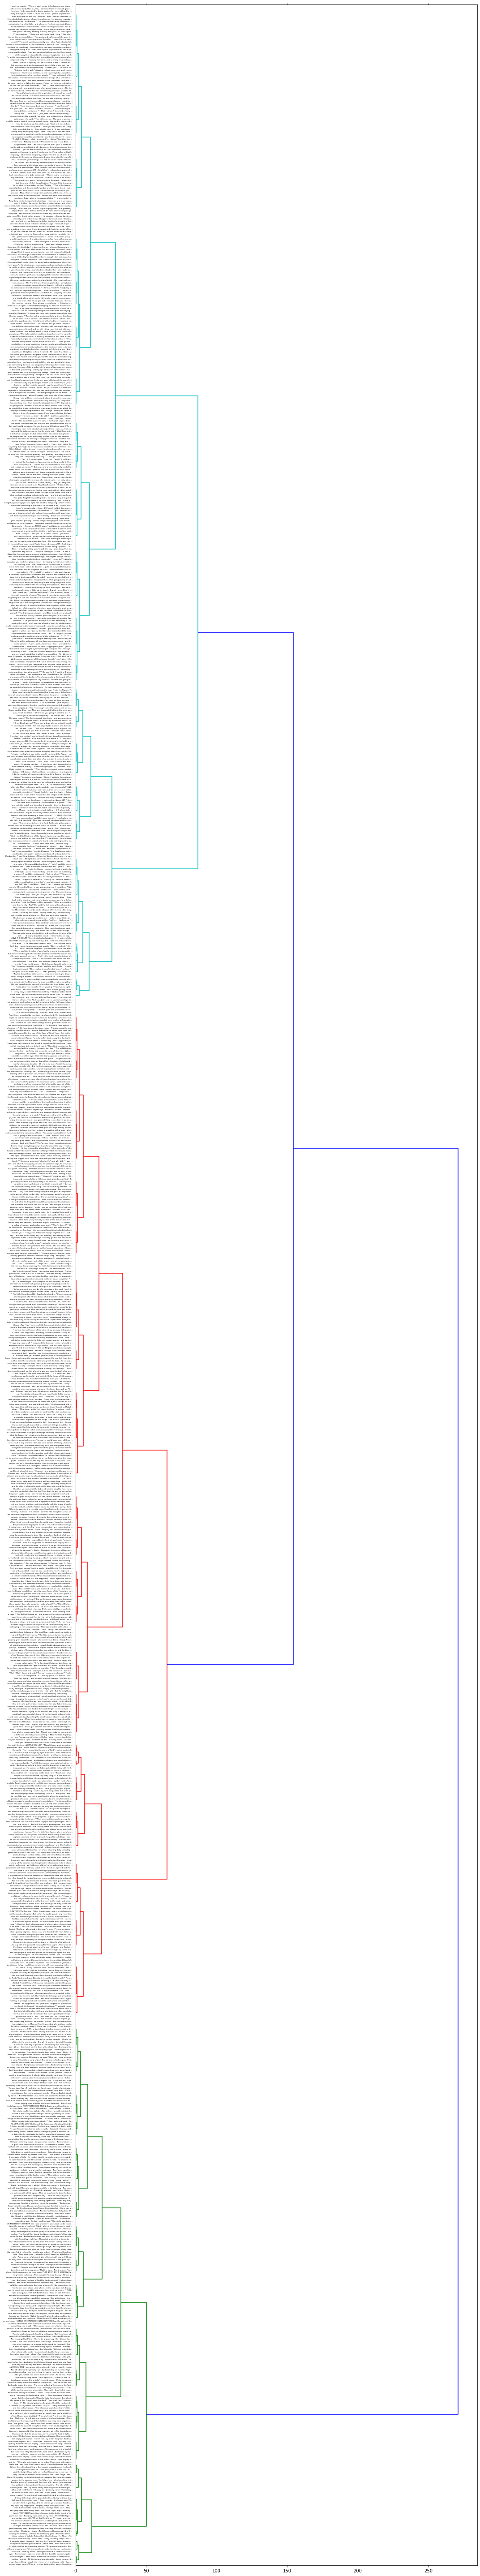

In [ ]:
from scipy.cluster.hierarchy import ward, dendrogram
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

MAX_COPHENETIC_DIST = max(linkage_matrix[:,2]) * 0.36 # max distance between points to be considered together. can be tuned.

fig, ax = plt.subplots(figsize=(15, 80)) # set size
ax = dendrogram(linkage_matrix, orientation="right", color_threshold=MAX_COPHENETIC_DIST, leaf_font_size=4,
                labels=x.apply(lambda x: x if len(x) < 70 else x[:70  - 3] + "...").tolist())

plt.tick_params(axis= 'x', which='both',  bottom='off', top='off',labelbottom='off')

plt.tight_layout() #show plot with tight layout
plt.savefig('ward_clusters_all.png', dpi=300)

In [14]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X_svd,y)  

In [ ]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 3, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2,
       3, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 3, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1,
       3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 2, 2, 3, 3, 2,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
books_sample['cluster']=y_pred

In [16]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y, y_pred)

-0.11125000000000007

In [17]:
c=0

for i in range(0,999):

  if(books_sample['cluster'][i]!=books_sample['encoded_author'][i]):

    c+=1

print(c)

888


In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


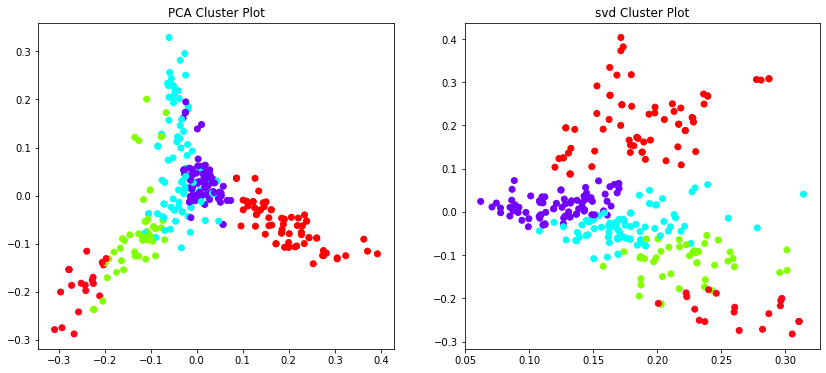

In [19]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    #tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(data[max_items,:])    

    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(svd[idx, 0], svd[idx, 1], c=label_subset)
    ax[1].set_title('svd Cluster Plot')
    
plot_tsne_pca(text, y_pred)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, y_pred, tfidf.get_feature_names(), 20)


Cluster 0
day,thel,green,away,infant,cloud,mother,sleep,happy,father,night,like,little,weep,joy,sweet,love,thy,thou,thee

Cluster 1
quite,come,queen,dear,way,just,time,miss,mr,think,thing,like,know,rabbit,thought,ll,say,little,alice,said

Cluster 2
king,thought,elton,old,did,miss,say,thing,time,great,man,good,weston,came,harriet,emma,said,mrs,mr,little

Cluster 3
water,sperm,came,whales,long,white,time,great,boat,captain,old,head,ye,little,sea,ahab,ship,man,like,whale

Cluster 4
added,went,quite,think,queen,jury,duchess,don,did,gryphon,king,know,mock,turtle,hare,march,dormouse,hatter,alice,said


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
